# Regressão Logística

## Dataset de Previsão e Detecção de Risco de Crédito

Variável target ou classe:<br />
credit.rating<br />
1 - concedeu crédito<br />
0 - não concedeu crédito

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [3]:
df = pd.read_csv('credit_dataset_final.csv')
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
df.columns

Index(['credit.rating', 'account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose', 'credit.amount',
       'savings', 'employment.duration', 'installment.rate', 'marital.status',
       'guarantor', 'residence.duration', 'current.assets', 'age',
       'other.credits', 'apartment.type', 'bank.credits', 'occupation',
       'dependents', 'telephone', 'foreign.worker'],
      dtype='object')

## Análise Exploratória

In [5]:
# variavél target ou classe
df['credit.rating'].value_counts()

1    700
0    300
Name: credit.rating, dtype: int64

In [6]:
print(df.describe())

       credit.rating  account.balance  credit.duration.months  \
count    1000.000000      1000.000000             1000.000000   
mean        0.700000         2.183000               20.903000   
std         0.458487         0.835589               12.058814   
min         0.000000         1.000000                4.000000   
25%         0.000000         1.000000               12.000000   
50%         1.000000         2.000000               18.000000   
75%         1.000000         3.000000               24.000000   
max         1.000000         3.000000               72.000000   

       previous.credit.payment.status  credit.purpose  credit.amount  \
count                     1000.000000     1000.000000     1000.00000   
mean                         2.292000        2.965000     3271.24800   
std                          0.620581        0.971967     2822.75176   
min                          1.000000        1.000000      250.00000   
25%                          2.000000        2.000000 

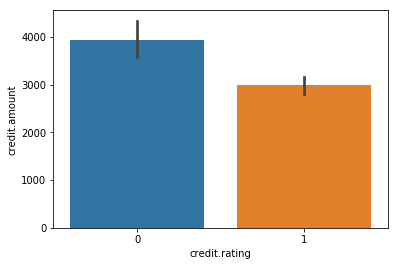

In [7]:
import seaborn as sns
sns.barplot(x='credit.rating',y='credit.amount', data=df)

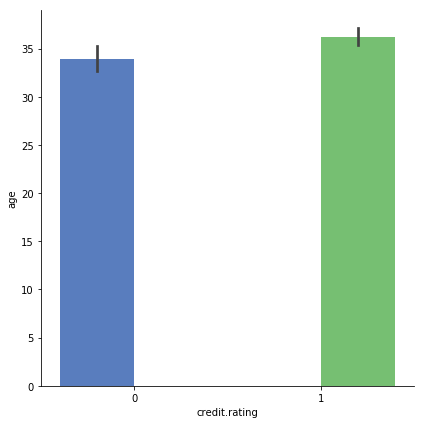

In [8]:
sns.factorplot(x='credit.rating', y='age', hue='credit.rating', data=df,
                   size=6, kind="bar", palette="muted")

In [9]:
df.age.mean()

35.542

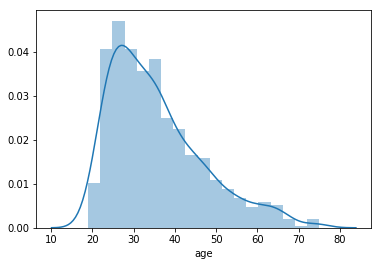

In [10]:
sns.distplot(df.age)

## Definindo X e Y

In [11]:
X = df.iloc[:,1:].values.astype(float)
y = df.iloc[:,0]

In [12]:
type(X)

numpy.ndarray

In [13]:
type(y)

pandas.core.series.Series

In [14]:
X[:3]

array([[1.000e+00, 1.800e+01, 3.000e+00, 2.000e+00, 1.049e+03, 1.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 2.000e+00,
        2.100e+01, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00],
       [1.000e+00, 9.000e+00, 3.000e+00, 4.000e+00, 2.799e+03, 1.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        3.600e+01, 2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00],
       [2.000e+00, 1.200e+01, 2.000e+00, 4.000e+00, 8.410e+02, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        2.300e+01, 2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]])

In [15]:
y[:3]

0    1
1    1
2    1
Name: credit.rating, dtype: int64

## Preparando os dados para aplicar Regressão Logistica<br />
## Colocando os dados em Escala

In [16]:
X.shape

(1000, 20)

In [17]:
standardization  = StandardScaler().fit(X)
Xst = standardization.transform(X)

print('Dataset Original')
X[:5].astype(int)

Dataset Original


array([[   1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1],
       [   1,    9,    3,    4, 2799,    1,    2,    2,    3,    1,    2,
           1,   36,    2,    1,    2,    3,    2,    1,    1],
       [   2,   12,    2,    4,  841,    2,    3,    2,    1,    1,    4,
           1,   23,    2,    1,    1,    2,    1,    1,    1],
       [   1,   12,    3,    4, 2122,    1,    2,    3,    3,    1,    2,
           1,   39,    2,    1,    2,    2,    2,    1,    2],
       [   1,   12,    3,    4, 2171,    1,    2,    4,    3,    1,    4,
           2,   38,    1,    2,    2,    2,    1,    1,    2]])

In [18]:
print('Dataset Em Escala')
Xst[:5]

Dataset Em Escala


array([[-1.41647598, -0.24085723,  1.14143673, -0.99332892, -0.78765692,
        -0.73084383, -1.30856567,  0.91847717, -1.28634145, -0.32021217,
         1.04698668, -0.3410551 , -1.28157308,  0.47801802, -1.75120525,
        -0.76143209,  0.14694918, -0.42828957, -0.82331789, -0.19601428],
       [-1.41647598, -0.9875727 ,  1.14143673,  1.06538387, -0.16738429,
        -0.73084383, -0.40361016, -0.87018333,  0.58879186, -0.32021217,
        -0.76597727, -1.29372298,  0.04036312,  0.47801802, -1.75120525,
         1.31331475,  0.14694918,  2.33486893, -0.82331789, -0.19601428],
       [-0.21911674, -0.73866754, -0.47076204,  1.06538387, -0.86138075,
         0.10536193,  0.50134535, -0.87018333, -1.28634145, -0.32021217,
         1.04698668, -1.29372298, -1.10531492,  0.47801802, -1.75120525,
        -0.76143209, -1.38377145, -0.42828957, -0.82331789, -0.19601428],
       [-1.41647598, -0.73866754,  1.14143673,  1.06538387, -0.40734119,
        -0.73084383, -0.40361016,  0.02414692,  

## Aplicando o Algoritmo

In [19]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(Xst, y)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Avaliando A Acurácia do Modelo

In [20]:
# check the accuracy on the training set
model.score(Xst, y)

0.775

### Examinando os Coeficientes

In [21]:
cols = df.columns.values
cols

array(['credit.rating', 'account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose',
       'credit.amount', 'savings', 'employment.duration',
       'installment.rate', 'marital.status', 'guarantor',
       'residence.duration', 'current.assets', 'age', 'other.credits',
       'apartment.type', 'bank.credits', 'occupation', 'dependents',
       'telephone', 'foreign.worker'], dtype=object)

In [22]:
cols_atributos = cols[1:]
cols_atributos

array(['account.balance', 'credit.duration.months',
       'previous.credit.payment.status', 'credit.purpose',
       'credit.amount', 'savings', 'employment.duration',
       'installment.rate', 'marital.status', 'guarantor',
       'residence.duration', 'current.assets', 'age', 'other.credits',
       'apartment.type', 'bank.credits', 'occupation', 'dependents',
       'telephone', 'foreign.worker'], dtype=object)

In [23]:
len(cols_atributos)

20

In [24]:
model.coef_[0]

array([ 0.67064222, -0.27669158,  0.36111941, -0.35777913, -0.30747001,
        0.3676245 ,  0.2053669 , -0.29253095,  0.20036286,  0.0942617 ,
       -0.03960407, -0.24420229,  0.09899829,  0.14170967,  0.14903121,
       -0.08787836, -0.03044483, -0.05360281,  0.16686263,  0.24558817])

In [25]:
len(model.coef_[0])

20

In [26]:
# examine the coefficients
elementos = [[x,y] for x, y in zip(cols_atributos, model.coef_[0])]
elementos

[['account.balance', 0.6706422196200345],
 ['credit.duration.months', -0.27669158436952535],
 ['previous.credit.payment.status', 0.36111940717998753],
 ['credit.purpose', -0.3577791330647178],
 ['credit.amount', -0.3074700082143304],
 ['savings', 0.3676245037395642],
 ['employment.duration', 0.20536689635504715],
 ['installment.rate', -0.29253094669308644],
 ['marital.status', 0.20036285645183416],
 ['guarantor', 0.0942616957484897],
 ['residence.duration', -0.03960406900848034],
 ['current.assets', -0.24420229425865905],
 ['age', 0.09899829241768397],
 ['other.credits', 0.1417096742671958],
 ['apartment.type', 0.1490312115088367],
 ['bank.credits', -0.08787836059911981],
 ['occupation', -0.030444834205835273],
 ['dependents', -0.053602809318327685],
 ['telephone', 0.16686262546906425],
 ['foreign.worker', 0.24558816698411945]]

In [27]:
# examine the coefficients
pd.DataFrame(elementos, columns=['Atributo', 'Coeficiente'])

,Atributo,Coeficiente
0,account.balance,0.670642
1,credit.duration.months,-0.276692
2,previous.credit.payment.status,0.361119
3,credit.purpose,-0.357779
4,credit.amount,-0.307470
5,savings,0.367625
6,employment.duration,0.205367
7,installment.rate,-0.292531
8,marital.status,0.200363
9,guarantor,0.094262


## Avaliando o modelo usando split de dados

In [28]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xst, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted[:5])

[1 0 1 1 0]


In [30]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs[:5])

[[0.34614015 0.65385985]
 [0.50576614 0.49423386]
 [0.13488831 0.86511169]
 [0.09869362 0.90130638]
 [0.50304835 0.49695165]]


In [31]:
print('Valores Previstos e suas Probalidades')
elementos = [[x,y] for x, y in zip(predicted,probs)]
elementos
df2 = pd.DataFrame(elementos, columns=['Classe', 'Probabilidade'])
df2.head(10)

Valores Previstos e suas Probalidades


,Classe,Probabilidade
0,1,"[0.34614015315095203, 0.653859846849048]"
1,0,"[0.50576613753089, 0.49423386246911]"
2,1,"[0.13488830921011485, 0.8651116907898851]"
3,1,"[0.09869361786030706, 0.9013063821396929]"
4,0,"[0.503048353413627, 0.496951646586373]"
5,0,"[0.5962526750232171, 0.40374732497678284]"
6,1,"[0.06326764859174472, 0.9367323514082553]"
7,1,"[0.14762673286171546, 0.8523732671382845]"
8,1,"[0.12703997138673007, 0.8729600286132699]"
9,1,"[0.09170745759387333, 0.9082925424061267]"


In [32]:
# generate evaluation metrics
print ('Acurácia: ', metrics.accuracy_score(y_test, predicted))
print ('Curva ROC: ',metrics.roc_auc_score(y_test, probs[:, 1]))

Acurácia:  0.7466666666666667
Curva ROC:  0.792


In [33]:
print ("Matriz de Confusão:\n",metrics.confusion_matrix(y_test, predicted))
print ("\nMétricas Relacionadas:\n",metrics.classification_report(y_test, predicted))

Matriz de Confusão:
 [[ 40  60]
 [ 16 184]]

Métricas Relacionadas:
              precision    recall  f1-score   support

          0       0.71      0.40      0.51       100
          1       0.75      0.92      0.83       200

avg / total       0.74      0.75      0.72       300



## Avaliando o modelo usando Cross-validation

In [34]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), Xst, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.74 0.79 0.73 0.74 0.77 0.76 0.82 0.82 0.55 0.72]
0.744


## Importância dos Atributos

## Seleção Univariada
Testes estatísticos podem ser usados para selecionar os atributos que possuem forte relacionamento com a variável que estamos tentando prever.<br/> O Scikit-learn fornece a função SelectKBest() que pode ser usada com diversos testes estatísticos, para selecionar os atributos.<br /> Vamos usar um teste que estudamos no capítulo anterior, o teste qui-quadrado. Vamos seelcionar os 4 melhores atributos que podem ser usados como variáveis preditoras.

Veremos abaixo o score para cada atributo e os 4 atributos com maior score e que portanto devem ser selecionados como variáveis preditoras.

In [37]:
# Extração de Variáveis com Testes Estatísticos Univariados (Teste qui-quadrado)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Extração de Variáveis
test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit(X, y)

# Sumarizando o score
#print(df.columns[1:])
#print(fit.scores_)
#features = fit.transform(X)

tuplas = []
for coef, var in sorted(zip(map(abs, fit.scores_), df.columns[1:]), reverse = True):
    #print ("%6.3f %s" % (coef,var))
    tuplas.append([var,coef])

dfsu = pd.DataFrame(tuplas, columns=['Atributo','Importância'])
dfsu

,Atributo,Importância
0,credit.amount,58264.415475
1,credit.duration.months,321.030795
2,account.balance,36.808259
3,age,30.178268
4,savings,24.503837
5,current.assets,9.503534
6,previous.credit.payment.status,8.141694
7,employment.duration,6.961881
8,marital.status,3.993335
9,credit.purpose,3.623625


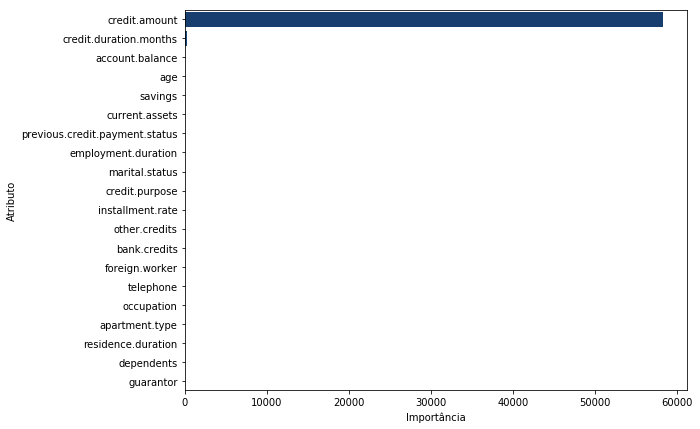

In [38]:
fig = plt.figure(figsize=(9,7))
fig.add_subplot(1,1,1)
plt.style.use('ggplot')
palette = 'Blues_r'
sns.barplot(y='Atributo',x='Importância', data=dfsu, palette=palette)
plt.show()

## Eliminação Recursiva de Atributos
Esta é outra técnica para seleção de atributos, que recursivamente remove os atributos e constrói o modelo com os atributos remanescentes. Esta técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo. Em inglês esta técnia é chamada Recursive Feature Elimination (RFE).

O exemplo abaixo utiliza a técnica de eliminação recursiva de atributos com um algoritmo de Regressão Logística para selecionar as 10 melhores variáveis preditoras. O RFE selecionou as variáveis preg, mass e pedi, que estão marcadas como True em "Atributos Selecionados" e com valor 1 em "Ranking dos Atributos".

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# RFE
rfe = RFE(model, 10)
fit = rfe.fit(X, y)

# Print dos resultados
print("Número de Atributos: %d" % fit.n_features_)
#print(df.columns[1:])
print("Atributos Selecionados: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)

Número de Atributos: 10
Atributos Selecionados: [ True False  True  True False  True  True False False False False  True
 False  True  True  True False False False  True]
Ranking dos Atributos: [ 1  8  1  1 11  1  1  4  5  7  9  1 10  1  1  1  2  6  3  1]


In [40]:
dfrfe = pd.DataFrame()
dfrfe['atributo'] = df.columns[1:]
dfrfe['ranking'] = fit.ranking_
dfrfe = dfrfe.sort_values('ranking')
dfrfe

,atributo,ranking
0,account.balance,1
15,bank.credits,1
14,apartment.type,1
13,other.credits,1
11,current.assets,1
6,employment.duration,1
19,foreign.worker,1
3,credit.purpose,1
2,previous.credit.payment.status,1
5,savings,1


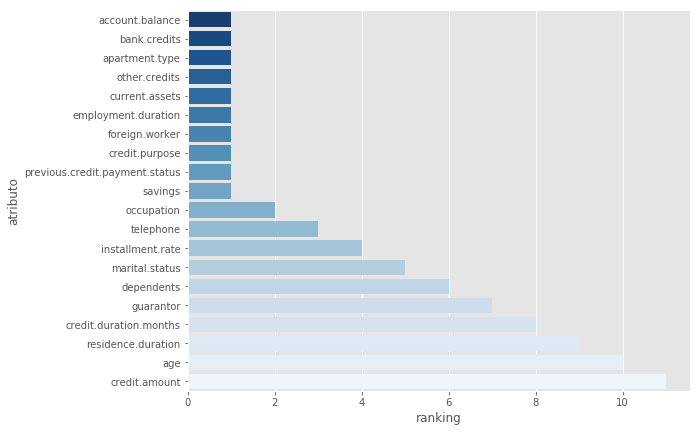

In [41]:
fig = plt.figure(figsize=(9,7))
fig.add_subplot(1,1,1)
plt.style.use('ggplot')
palette = 'Blues_r'
sns.barplot(y='atributo',x='ranking', data=dfrfe, palette=palette)
plt.show()

## Importância dos Atributos - Usando Árvores de Decisão para coletar a importância
## Método Ensemble para Seleção de Variáveis
Bagged Decision Trees, como o algoritmo RandomForest, podem ser usados para estimar a importância de cada atributo. Esse método retorna um score para cada atributo.

Quanto maior o score, maior a importância do atributo.

In [42]:
# Criação do Modelo - Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
modeloETC = ExtraTreesClassifier()
modeloETC.fit(X, y)

# Print dos Resultados
#print(df.columns[1:])
print(modeloETC.feature_importances_)

[0.11009446 0.08104111 0.05908955 0.05692187 0.08216859 0.04782878
 0.05488629 0.05744616 0.04217485 0.02538948 0.05298643 0.05677734
 0.07324665 0.02426601 0.03353901 0.03159446 0.0501551  0.02184606
 0.03234297 0.00620482]


In [43]:
tupla = []
for coef, var in sorted(zip(map(abs, modeloETC.feature_importances_), df.columns[1:]), reverse = True):
    print ("%6.3f %s" % (coef,var))
    tupla.append([var,coef])

 0.110 account.balance
 0.082 credit.amount
 0.081 credit.duration.months
 0.073 age
 0.059 previous.credit.payment.status
 0.057 installment.rate
 0.057 credit.purpose
 0.057 current.assets
 0.055 employment.duration
 0.053 residence.duration
 0.050 occupation
 0.048 savings
 0.042 marital.status
 0.034 apartment.type
 0.032 telephone
 0.032 bank.credits
 0.025 guarantor
 0.024 other.credits
 0.022 dependents
 0.006 foreign.worker


In [44]:
dfimp2 = pd.DataFrame(tupla,columns=['atributo','importancia'] )
dfimp2

,atributo,importancia
0,account.balance,0.110094
1,credit.amount,0.082169
2,credit.duration.months,0.081041
3,age,0.073247
4,previous.credit.payment.status,0.059090
5,installment.rate,0.057446
6,credit.purpose,0.056922
7,current.assets,0.056777
8,employment.duration,0.054886
9,residence.duration,0.052986


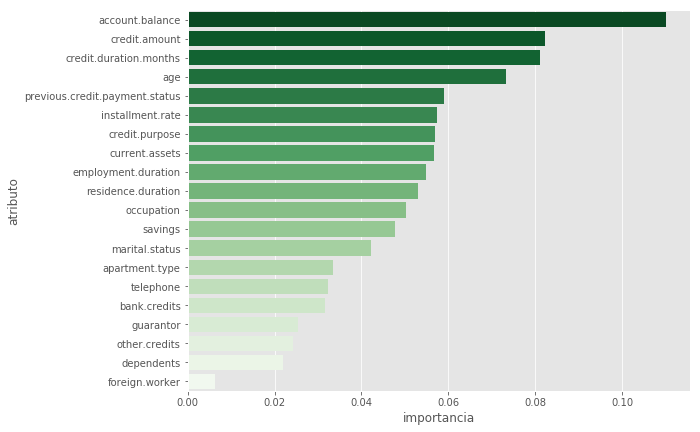

In [45]:
fig = plt.figure(figsize=(9,7))
fig.add_subplot(1,1,1)
plt.style.use('ggplot')
palette = 'Greens_r'
sns.barplot(y='atributo',x='importancia', data=dfimp2, palette=palette)
plt.show()

## Realizando Previsões

In [46]:
df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [47]:
df.loc[0,:].values

array([   1,    1,   18,    3,    2, 1049,    1,    1,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1])

In [48]:
df['account.balance'].value_counts()

3    457
1    274
2    269
Name: account.balance, dtype: int64

In [49]:
df.savings.value_counts()

1    603
4    183
3    111
2    103
Name: savings, dtype: int64

In [50]:
Xprev1 = np.array([3,   18,    3,    3, 1049,    1,    4,    4,    1,    1,
          4,    2,   21,    2,    1,    1,    3,    1,    1,    1])
Xprev1

array([   3,   18,    3,    3, 1049,    1,    4,    4,    1,    1,    4,
          2,   21,    2,    1,    1,    3,    1,    1,    1])

In [51]:
Xprev1 = Xprev1.reshape(1, -1)
Xprev1

array([[   3,   18,    3,    3, 1049,    1,    4,    4,    1,    1,    4,
           2,   21,    2,    1,    1,    3,    1,    1,    1]])

In [52]:
# Colocando o valor na Escala
#standardization = StandardScaler()
Xst_prev1 = standardization.transform(Xprev1)
Xst_prev1

array([[ 0.9782425 , -0.24085723,  1.14143673,  0.03602747, -0.78765692,
        -0.73084383,  1.40630087,  0.91847717, -1.28634145, -0.32021217,
         1.04698668, -0.3410551 , -1.28157308,  0.47801802, -1.75120525,
        -0.76143209,  0.14694918, -0.42828957, -0.82331789, -0.19601428]])

In [53]:
model2.predict(Xst_prev1)

array([1])

In [54]:
model2.predict_proba(Xst_prev1)

array([[0.23120965, 0.76879035]])

In [55]:
df.loc[100,:].values

array([   1,    3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])

In [56]:
Xprev2 = np.array([ 3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,
          4,    1,   40,    2,    2,    1,    3,    1,    2,    1])
Xprev2

array([   3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,    4,
          1,   40,    2,    2,    1,    3,    1,    2,    1])

In [57]:
Xprev2 = Xprev2.reshape(1, -1)
Xprev2

array([[   3,   24,    3,    2, 3777,    3,    2,    4,    3,    1,    4,
           1,   40,    2,    2,    1,    3,    1,    2,    1]])

In [58]:
# Colocando o valor na Escala
#standardization = StandardScaler()
Xst_prev2 = standardization.transform(Xprev2)
Xst_prev2

array([[ 0.9782425 ,  0.25695309,  1.14143673, -0.99332892,  0.1792595 ,
         0.94156768, -0.40361016,  0.91847717,  0.58879186, -0.32021217,
         1.04698668, -1.29372298,  0.39287944,  0.47801802,  0.13586937,
        -0.76143209,  0.14694918, -0.42828957,  1.21459768, -0.19601428]])

In [59]:
model2.predict(Xst_prev2)

array([1])

In [60]:
model2.predict_proba(Xst_prev2)

array([[0.05252126, 0.94747874]])

In [61]:
df.loc[5,:].values

array([   1,    1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])

In [62]:
Xprev = np.array([1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,
          3,    1,   48,    2,    1,    2,    2,    2,    1,    2])
Xprev

array([   1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,    3,
          1,   48,    2,    1,    2,    2,    2,    1,    2])

In [63]:
Xprev = Xprev.reshape(1, -1)
Xprev

array([[   1,   10,    3,    4, 2241,    1,    1,    1,    3,    1,    3,
           1,   48,    2,    1,    2,    2,    2,    1,    2]])

In [64]:
# Colocando o valor na Escala
Xst_prev = standardization.transform(Xprev)
Xst_prev

array([[-1.41647598, -0.90460432,  1.14143673,  1.06538387, -0.36516265,
        -0.73084383, -1.30856567, -1.76451358,  0.58879186, -0.32021217,
         0.14050471, -1.29372298,  1.09791208,  0.47801802, -1.75120525,
         1.31331475, -1.38377145,  2.33486893, -0.82331789,  5.10166904]])

In [65]:
# aplicando o modelo de Regressão Logística
model2.predict(Xst_prev)

array([1])

In [66]:
model2.predict_proba(Xst_prev)

array([[0.11313744, 0.88686256]])